<a href="https://colab.research.google.com/github/NtimTim/DS_School_Home_Work/blob/main/Hometask/Task2_dmrf_visual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/4vel/python-intro/blob/main/Hometask/Task2_dmrf_visual.ipynb)

# Задание

* Используя данные об объектах недвижимости на сайте "наш.дом.рф" или cian.ru, провести мини-исследование рынка строящейся/готовой недвижимости в одном или нескольких регионах с помощью pandas, matplotlib, seaborn, plotly и других инструментов.
#### Идеи для мини-исследования
* Рассчитать средние цены за квадратный метр по регионам. Важно чтобы пропуски не учитывались при расчете средней цены.
* Рассчитать объемы вводимого жилья по регионам и по годам.
* Сравнить этажность домов, количество квартир, жилую площадь, количество парковочных мест и цену за квадратный метр в разных регионах.
* Визуализировать разброс, связь, доли, распределение этих показателей по регионам.
* Сделать выводы по каждому из расчетов и графиков



In [ ]:
# Ваш код здесь...

In [7]:
import pickle

In [18]:
import pandas as pd


In [21]:
from google.colab import files
uploaded = files.upload()

Saving df_nashdomrf.pkl to df_nashdomrf.pkl


In [22]:
df = pickle.load(open('df_nashdomrf.pkl', 'rb'))
df.head()

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,13383,39024,28105,72,"г Тюмень, ул Профсоюзная, д. 56",4,20,68,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,13398,37165,28141,72,"г Тюмень, ул Профсоюзная, д. 56",7,10,43,2024-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,13391,37219,28101,72,"г Тюмень, ул Профсоюзная, д. 56",3,12,44,2023-12-31,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [32]:
df.shape

(11714, 110)

In [46]:
df.columns
#df.keys()

Index(['id', 'hobjId', 'pdId', 'region', 'address', 'floorMin', 'floorMax',
       'objElemLivingCnt', 'objReady100PercDt', 'wallMaterialShortDesc',
       ...
       'metro.time', 'metro.isWalk', 'metro.colors', 'complexShortNm',
       'airQualityIndexValue', 'greenAreaIndexValue',
       'developer.bankruptStage.bankruptStageCd',
       'developer.bankruptStage.bankruptStageDesc',
       'developer.bankruptStage.bankruptLawUrl',
       'developer.orgBankruptMsgDttm'],
      dtype='object', length=110)

In [45]:
#df.head(1)
#region,
df.sample(5)

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,...,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
6779,47827,128456,628079,16,с Высокая Гора,5,5,58,2024-06-30,Кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2898,50730,131373,681865,52,"г Нижний Новгород, пр-кт Кирова, д. 2А",8,8,102,2024-12-31,Монолит-кирпич,...,9.05,True,[#D80707],NaN,NaN,NaN,NaN,NaN,NaN,NaN
6918,53740,134408,712678,72,"г Тюмень, д. 1028",5,5,20,2025-06-30,Другое,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2032,55834,136548,795475,71,"город Тула, ул Рязанская",5,5,21,2027-06-30,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1135,32103,42705,161413,55,"г Омск, кв-л 1-й, д. 1",10,11,80,2025-03-31,Монолит-кирпич,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


from matplotlib import pyplot as plt
_df_28['id'].plot(kind='hist', bins=20, title='id')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_29['hobjId'].plot(kind='hist', bins=20, title='hobjId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_30['pdId'].plot(kind='hist', bins=20, title='pdId')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_31['region'].plot(kind='hist', bins=20, title='region')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_32.groupby('address').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_33.groupby('objReady100PercDt').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_34.groupby('wallMaterialShortDesc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_35.groupby('objLkFinishTypeDesc').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_36.plot(kind='scatter', x='id', y='hobjId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_37.plot(kind='scatter', x='hobjId', y='pdId', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_38.plot(kind='scatter', x='pdId', y='region', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_39.plot(kind='scatter', x='region', y='floorMin', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['objCompensFundFlg']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_40.sort_values('objCompensFundFlg', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('address')):
  _plot_series(series, series_name, i)
  fig.legend(title='address', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('objCompensFundFlg')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['objCompensFundFlg']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_41.sort_values('objCompensFundFlg', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('objReady100PercDt')):
  _plot_series(series, series_name, i)
  fig.legend(title='objReady100PercDt', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('objCompensFundFlg')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['objCompensFundFlg']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_42.sort_values('objCompensFundFlg', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('wallMaterialShortDesc')):
  _plot_series(series, series_name, i)
  fig.legend(title='wallMaterialShortDesc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('objCompensFundFlg')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['objCompensFundFlg']
  ys = series['id']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_43.sort_values('objCompensFundFlg', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('objLkFinishTypeDesc')):
  _plot_series(series, series_name, i)
  fig.legend(title='objLkFinishTypeDesc', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('objCompensFundFlg')
_ = plt.ylabel('id')

from matplotlib import pyplot as plt
_df_44['id'].plot(kind='line', figsize=(8, 4), title='id')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_45['hobjId'].plot(kind='line', figsize=(8, 4), title='hobjId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_46['pdId'].plot(kind='line', figsize=(8, 4), title='pdId')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_47['region'].plot(kind='line', figsize=(8, 4), title='region')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['objReady100PercDt'].value_counts()
    for x_label, grp in _df_48.groupby('address')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('address')
_ = plt.ylabel('objReady100PercDt')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['wallMaterialShortDesc'].value_counts()
    for x_label, grp in _df_49.groupby('objReady100PercDt')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('objReady100PercDt')
_ = plt.ylabel('wallMaterialShortDesc')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['objLkFinishTypeDesc'].value_counts()
    for x_label, grp in _df_50.groupby('wallMaterialShortDesc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('wallMaterialShortDesc')
_ = plt.ylabel('objLkFinishTypeDesc')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['objLkFreePlanDesc'].value_counts()
    for x_label, grp in _df_51.groupby('objLkFinishTypeDesc')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('objLkFinishTypeDesc')
_ = plt.ylabel('objLkFreePlanDesc')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_52['address'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_52, x='id', y='address', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_53['objReady100PercDt'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_53, x='id', y='objReady100PercDt', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_54['wallMaterialShortDesc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_54, x='id', y='wallMaterialShortDesc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_55['objLkFinishTypeDesc'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_55, x='id', y='objLkFinishTypeDesc', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [60]:
pd.set_option('display.max_columns',None)
#df.columns.tolist()
df.head()

,id,hobjId,pdId,region,address,floorMin,floorMax,objElemLivingCnt,objReady100PercDt,wallMaterialShortDesc,objLkFinishTypeDesc,objLkFreePlanDesc,objElemParkingCnt,objSquareLiving,rpdNum,rpdPdfLink,rpdIssueDttm,objLkLatitude,objLkLongitude,objCompensFundFlg,objProblemFlg,objLkClassDesc,loadDttm,photoRenderDTO,objGuarantyEscrowFlg,objectType,miniUrl,residentialBuildings,newBuildingId,objFloorCnt,objFlatCnt,objFlatSq,objNonlivElemCnt,objStatus,isAvailableWantLiveHere,objTransferPlanDt,objInfrstrBicycleLaneFlg,objInfrstrPlaygrndCnt,objInfrstrSportGroundCnt,objInfrstrTrashAreaCnt,objInfrstrObjPrkngCnt,objInfrstrNotObjPrkngCnt,objInfrstrRampFlg,objInfrstrCurbLoweringFlg,objElevatorWheelchairCnt,objElevatorPassengerCnt,objElevatorCargoCnt,objElevatorCargoPassengerCnt,soldOutPerc,objPriceAvg,generalContractorNm,nonlivFirstFloor,objectTransportInfo,conclusion,objLkSaleDepEmail,objGreenHouseFlg,objEnergyEffShortDesc,infrastructureIndexValue,developer.devId,developer.devShortCleanNm,developer.devShortNm,developer.devFullCleanNm,developer.problObjCnt,developer.buildObjCnt,developer.comissObjCnt,developer.regRegionDesc,developer.devPhoneNum,developer.devSite,developer.devEmail,developer.devInn,developer.devOgrn,developer.devKpp,developer.devLegalAddr,developer.devFactAddr,developer.lastRpdId,developer.fundGuarantyFlg,developer.devOrgRegRegionCd,developer.devEmplMainFullNm,developer.developerGroupName,developer.orgForm.id,developer.orgForm.fullForm,developer.orgForm.shortForm,developer.companyGroupId,developer.objGuarantyEscrowFlg,developer.govFundFlg,objLivCeilingHeight,quartography.objLivElem1KCnt,quartography.objLivElem2KCnt,quartography.objLivElem3KCnt,quartography.objLivElem4KCnt,quartography.objLivElemCnt,quartography.objLivElemEntrCnt,quartography.objLivElemEntrFloorAvg,nameObj,transportDistIndex,transportDistIndexValue,metro.id,metro.name,metro.line,metro.color,metro.time,metro.isWalk,metro.colors,complexShortNm,airQualityIndexValue,greenAreaIndexValue,developer.bankruptStage.bankruptStageCd,developer.bankruptStage.bankruptStageDesc,developer.bankruptStage.bankruptLawUrl,developer.orgBankruptMsgDttm
0,13399,34754,28141,72,"г Тюмень, ул Профсоюзная, д. 56",1,1,0,2024-12-31,Другое,Без отделки,Нет,125,0.00,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,08-12-2023 15:23,57.1519,65.5544,0,0,Элитный,16-12-2023 01:38,"[{'objId': 13399, 'pdId': 28141, 'rpdId': 8028...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,0,34754,1,0,0.0,0,0,True,28-02-2025 12:00,0,0.0,0.0,1.0,0.0,0.0,1,1,0.0,8.0,7.0,15,0.917243,50768.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),1.0,[],False,info@2mengroup.ru,0,B,10.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",804699,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,13397,37201,28141,72,"г Тюмень, ул Профсоюзная, д. 56",6,12,65,2024-12-31,Другое,Без отделки,Нет,0,6251.10,72-000097,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,08-12-2023 15:23,57.1519,65.5544,0,0,Элитный,16-12-2023 01:38,"[{'objId': 13397, 'pdId': 28141, 'rpdId': 8028...",0,normal,https://xn--80az8a.xn--d1aqf.xn--p1ai/api/ext/...,1,37201,12,65,6251.1,70,0,True,28-02-2025 12:00,0,1.0,1.0,1.0,11.0,10.0,1,1,0.0,5.0,4.0,9,0.999984,47163.0,ООО Транспромжилстрой-2005 (ИНН: 7204097730),0.0,[],False,info@2mengroup.ru,0,B,10.0,306,2МЕН ГРУПП,2МЕН ГРУПП,2МЕН ГРУПП,0,5,0,Тюменская область,+7(345)279-18-88,2mengroup.ru,info@2mengroup.ru,7701651356,1067746424899,720301001,"Тюменская область, город Тюмень, улица Комсомо...","Тюменская область, город Тюмень, улица Комсомо...",804699,1,72.0,Киселев Сергей Михайлович,2МЕН ГРУПП ДЕВЕЛОПМЕНТ,1,Акционерное общество,АО,5776.0,0,0,"2,96",0.0,24.0,

In [42]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [113]:
df_no_NaN = df.loc[df['objPriceAvg'].notnull()]
df_region_price_series = df_no_NaN.groupby('region', as_index=True)['objPriceAvg'].mean()
df_region_price_series

region
1      97175.000000
2     102701.614035
3      83158.040816
4     110104.777778
5      56562.166667
          ...      
86    110474.466667
89    144591.076923
91    139035.682759
92    141886.416667
93    114752.000000
Name: objPriceAvg, Length: 82, dtype: float64

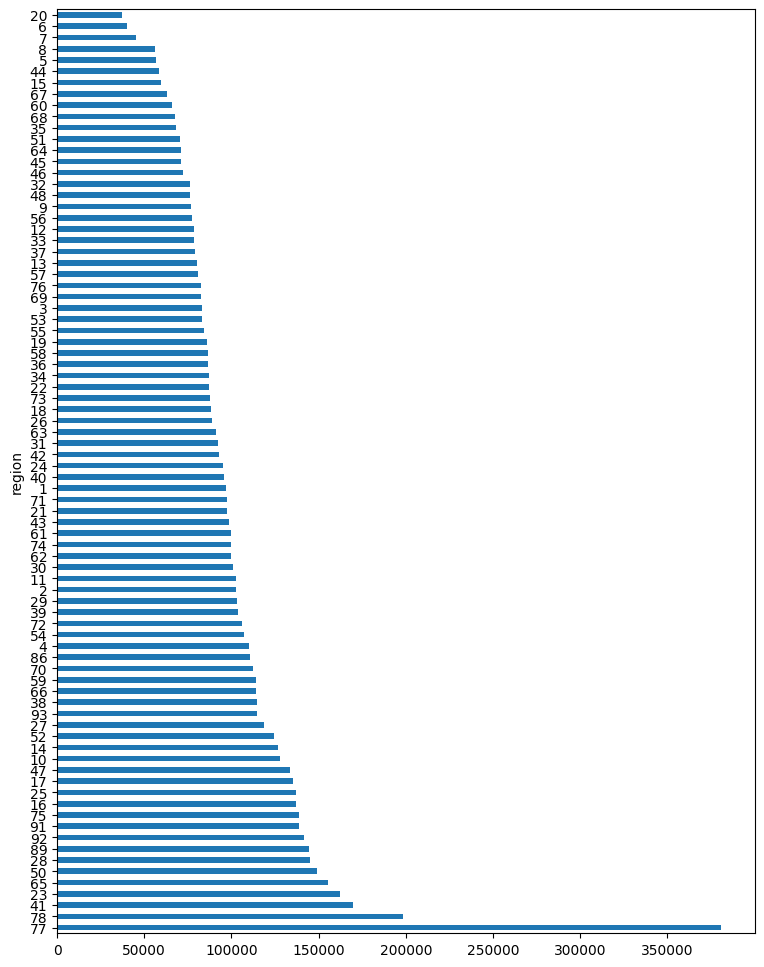

In [114]:
from pylab import rcParams
rcParams['figure.figsize'] = 9,12
df_region_price_series.sort_values(ascending=False).plot(kind='barh')
plt.show()


In [ ]:
#Делаем выводы^
# самые высокие средние цены в 77 регионе -Москва,
# на втором месте 78 регион - Санкт-Петербург,
# на третьем 41 регион - Петропавлоовск-Камчатский
# самые низкие в 20 регионе - Грозный